In [73]:
pwd

'C:\\Users\\REI-K0103\\Desktop\\Jupyter'

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

In [11]:
# reading 1 csv file from the website
df_tokyo = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/eria_jukyu_202403_03.csv')


In [19]:
# showing dataframe
df_tokyo.columns

Index(['単位[MW平均]', 'Unnamed: 1', 'Unnamed: 2', '供給力'], dtype='object')

In [22]:
df_tokyo.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1489 entries, ('DATE', 'TIME', 'エリア需要', '原子力', '火力(LNG)', '火力(石炭)', '火力(石油)', '火力(その他)', '水力', '地熱', 'バイオマス', '太陽光発電実績', '太陽光出力制御量', '風力発電実績', '風力出力制御量', '揚水') to ('2024/3/31', '23:30', '22400', '0', '10449', '4748', '56', '1027', '1797', '0', '497', '0', '0', '79', '0', '445')
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   単位[MW平均]    1489 non-null   object
 1   Unnamed: 1  1489 non-null   object
 2   Unnamed: 2  1489 non-null   object
 3   供給力         1489 non-null   object
dtypes: object(4)
memory usage: 360.0+ KB


In [41]:
df_tokyo1 = df_tokyo.reset_index()
df_tokyo1

level_0 level_1 level_2 level_3  level_4 level_5 level_6  level_7  \
0          DATE    TIME   エリア需要     原子力  火力(LNG)  火力(石炭)  火力(石油)  火力(その他)   
1      2024/3/1    0:00   29659       0    16563    5711     158     1833   
2      2024/3/1    0:30   28479       0    16201    5710     114     1733   
3      2024/3/1    1:00   28083       0    16123    5713     115     1700   
4      2024/3/1    1:30   27860       0    16294    5711     115     1684   
...         ...     ...     ...     ...      ...     ...     ...      ...   
1484  2024/3/31   21:30   24806       0    11275    4519      55     1003   
1485  2024/3/31   22:00   24204       0    11031    4565      55     1001   
1486  2024/3/31   22:30   23387       0    10782    4594      55     1005   
1487  2024/3/31   23:00   23056       0    10756    4676      55     1026   
1488  2024/3/31   23:30   22400       0    10449    4748      56     1027   

     level_8 level_9 level_10 level_11  level_12 level_13 level_14 level_15  \
0         水力      地熱    バイオマス  太陽光発電実績  太陽光出力制御量   風力発電実績  風力出力制御量       揚水   
1       1397       0      469        0         0       55        0        0   
2       1393       0      469        0         0       68        0        0   
3       1382       0      469        0         0       72        0        0   
4       1298       0      471        0         0       77        0        0   
...      ...     ...      ...      ...       ...      ...      ...      ...   
1484    1809       0      496        0         0       75        0     1182   
1485    1795       0      496        0         0       70        0      892   
1486    1790       0      496        0         0       76        0      721   
1487    1788       0      497        0         0       77        0      729   
1488    1797       0      497        0         0       79        0      445   

     単位[MW平均] Unnamed: 1 Unnamed: 2    供給力  
0         蓄電池        連系線        その他     合計  
1           0       3217        256  29659  
2           0       2484        306  28478  
3           0       2205        303  28082  
4           0       1893        316  27859  
...       ...        ...        ...    ...  
1484        0       4075        318  24807  
1485        0       3981        318  24204  
1486        0       3538        330  23387  
1487        0       3117        335  23056  
1488        0       2996        307  22401  

[1489 rows x 20 columns]

In [43]:
df1 = df_tokyo1.set_axis(df_tokyo1.iloc[0], axis=1).drop(0)
df1

0          DATE   TIME  エリア需要 原子力 火力(LNG) 火力(石炭) 火力(石油) 火力(その他)    水力 地熱  \
1      2024/3/1   0:00  29659   0   16563   5711    158    1833  1397  0   
2      2024/3/1   0:30  28479   0   16201   5710    114    1733  1393  0   
3      2024/3/1   1:00  28083   0   16123   5713    115    1700  1382  0   
4      2024/3/1   1:30  27860   0   16294   5711    115    1684  1298  0   
5      2024/3/1   2:00  27779   0   16192   5712    115    1674  1301  0   
...         ...    ...    ...  ..     ...    ...    ...     ...   ... ..   
1484  2024/3/31  21:30  24806   0   11275   4519     55    1003  1809  0   
1485  2024/3/31  22:00  24204   0   11031   4565     55    1001  1795  0   
1486  2024/3/31  22:30  23387   0   10782   4594     55    1005  1790  0   
1487  2024/3/31  23:00  23056   0   10756   4676     55    1026  1788  0   
1488  2024/3/31  23:30  22400   0   10449   4748     56    1027  1797  0   

0    バイオマス 太陽光発電実績 太陽光出力制御量 風力発電実績 風力出力制御量    揚水 蓄電池   連系線  その他     合計  
1      469       0        0     55       0     0   0  3217  256  29659  
2      469       0        0     68       0     0   0  2484  306  28478  
3      469       0        0     72       0     0   0  2205  303  28082  
4      471       0        0     77       0     0   0  1893  316  27859  
5      470       0        0     80       0     0   0  1916  318  27778  
...    ...     ...      ...    ...     ...   ...  ..   ...  ...    ...  
1484   496       0        0     75       0  1182   0  4075  318  24807  
1485   496       0        0     70       0   892   0  3981  318  24204  
1486   496       0        0     76       0   721   0  3538  330  23387  
1487   497       0        0     77       0   729   0  3117  335  23056  
1488   497       0        0     79       0   445   0  2996  307  22401  

[1488 rows x 20 columns]

In [50]:
# check for NaN values
df1.isnull().values.any()

False

In [51]:
df1.isnull().sum().sum()


0

In [55]:
# rename columns
df_tokyo1 = df1.rename(columns={'DATE':'DATE',
                                            'TIME':'TIME',
                                            'エリア需要':'DEMAND',
                                            '原子力': 'NUCLEAR',
                                    '火力(LNG)': 'LNG',
                                    '火力(石炭)': 'COAL',
                                    '火力(石油)': 'OIL',
                                    '火力(その他)': 'MCT',
                                    '水力': 'HYDRO',
                                    '地熱': 'GEOTHERMAL',
                                    'バイオマス': 'BIOMAS',
                                    '太陽光発電実績': 'PV OUTPUT',
                                    '太陽光出力制御量': 'PV CONTROL',
                                    '風力発電実績': 'WIND OUTPUT',
                                    '風力出力制御量': 'WIND CONTROL',
                                    '揚水': 'PUMP HYDRO',
                                    '蓄電池': 'STORAGE',
                                    '連系線': 'TRANSFER LINE',
                                    'その他': 'OTHER',
                                    '合計': 'TOTAL'})

In [56]:
df_tokyo1

0          DATE   TIME DEMAND NUCLEAR    LNG  COAL  OIL   MCT HYDRO  \
1      2024/3/1   0:00  29659       0  16563  5711  158  1833  1397   
2      2024/3/1   0:30  28479       0  16201  5710  114  1733  1393   
3      2024/3/1   1:00  28083       0  16123  5713  115  1700  1382   
4      2024/3/1   1:30  27860       0  16294  5711  115  1684  1298   
5      2024/3/1   2:00  27779       0  16192  5712  115  1674  1301   
...         ...    ...    ...     ...    ...   ...  ...   ...   ...   
1484  2024/3/31  21:30  24806       0  11275  4519   55  1003  1809   
1485  2024/3/31  22:00  24204       0  11031  4565   55  1001  1795   
1486  2024/3/31  22:30  23387       0  10782  4594   55  1005  1790   
1487  2024/3/31  23:00  23056       0  10756  4676   55  1026  1788   
1488  2024/3/31  23:30  22400       0  10449  4748   56  1027  1797   

0    GEOTHERMAL BIOMAS PV OUTPUT PV CONTROL WIND OUTPUT WIND CONTROL  \
1             0    469         0          0          55            0   
2             0    469         0          0          68            0   
3             0    469         0          0          72            0   
4             0    471         0          0          77            0   
5             0    470         0          0          80            0   
...         ...    ...       ...        ...         ...          ...   
1484          0    496         0          0          75            0   
1485          0    496         0          0          70            0   
1486          0    496         0          0          76            0   
1487          0    497         0          0          77            0   
1488          0    497         0          0          79            0   

0    PUMP HYDRO STORAGE TRANSFER LINE OTHER  TOTAL  
1             0       0          3217   256  29659  
2             0       0          2484   306  28478  
3             0       0          2205   303  28082  
4             0       0          1893   316  27859  
5             0       0          1916   318  27778  
...         ...     ...           ...   ...    ...  
1484       1182       0          4075   318  24807  
1485        892       0          3981   318  24204  
1486        721       0          3538   330  23387  
1487        729       0          3117   335  23056  
1488        445       0          2996   307  22401  

[1488 rows x 20 columns]

In [58]:
# Pair Plot plots relationships across the entire data frames numerical values
#sns.pairplot(df_tokyo1)

In [73]:
# data types
df1.dtypes

0
DATE             object
TIME             object
DEMAND           object
NUCLEAR          object
LNG              object
COAL             object
OIL              object
MCT              object
HYDRO            object
GEOTHERMAL       object
BIOMAS           object
PV OUTPUT        object
PV CONTROL       object
WIND OUTPUT      object
WIND CONTROL     object
PUMP HYDRO       object
STORAGE          object
TRANSFER LINE    object
OTHER            object
TOTAL            object
dtype: object

In [75]:
# convert data to numeric
df1 = df1.apply(pd.to_numeric, errors='ignore', downcast='float')
df1.dtypes

0
DATE              object
TIME              object
DEMAND           float32
NUCLEAR          float32
LNG              float32
COAL             float32
OIL              float32
MCT              float32
HYDRO            float32
GEOTHERMAL       float32
BIOMAS           float32
PV OUTPUT        float32
PV CONTROL       float32
WIND OUTPUT      float32
WIND CONTROL     float32
PUMP HYDRO       float32
STORAGE          float32
TRANSFER LINE    float32
OTHER            float32
TOTAL            float32
dtype: object

<Axes: >

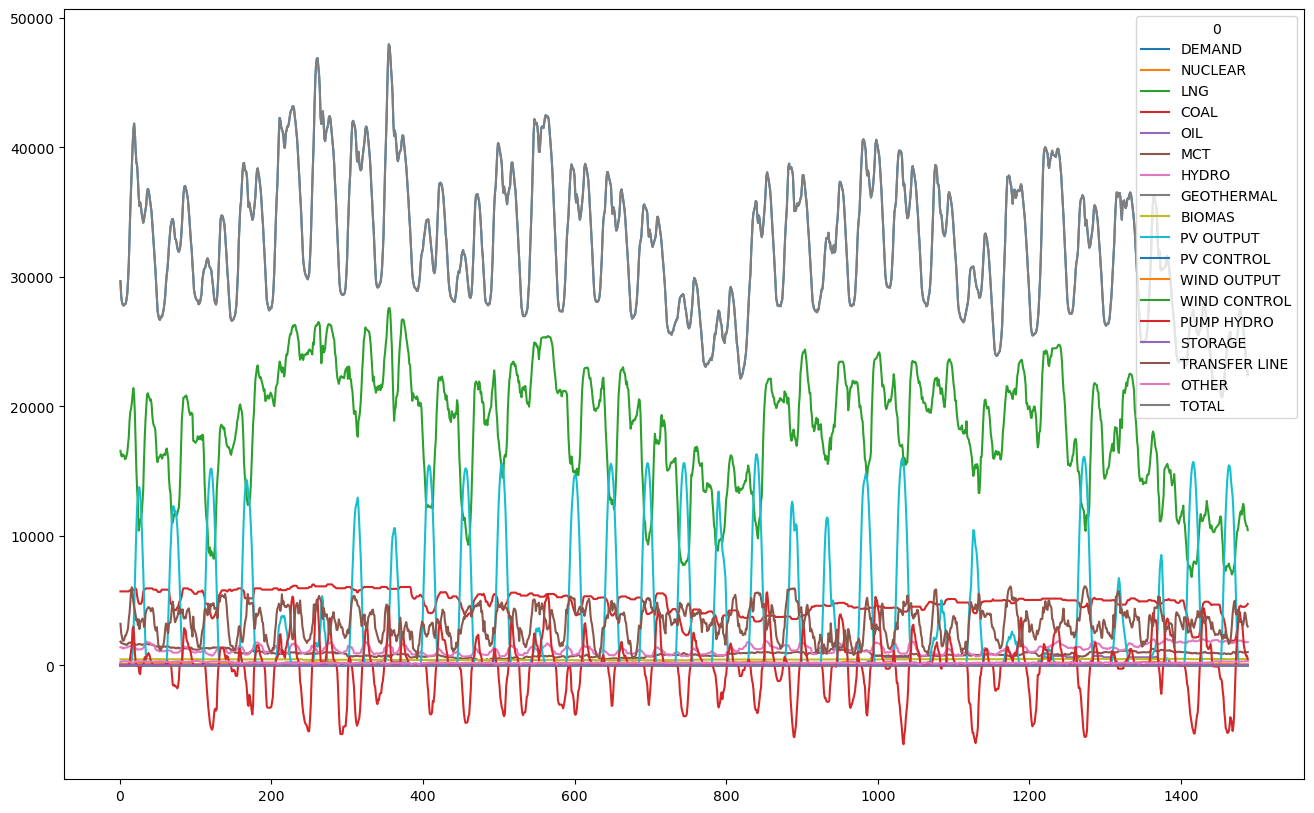

In [78]:
# plot all the data as one figure
df1.plot(figsize = (16, 10))

C:\Users\REI-K0103\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\REI-K0103\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\REI-K0103\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\REI-K0103\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<class 'seaborn.axisgrid.PairGrid'>


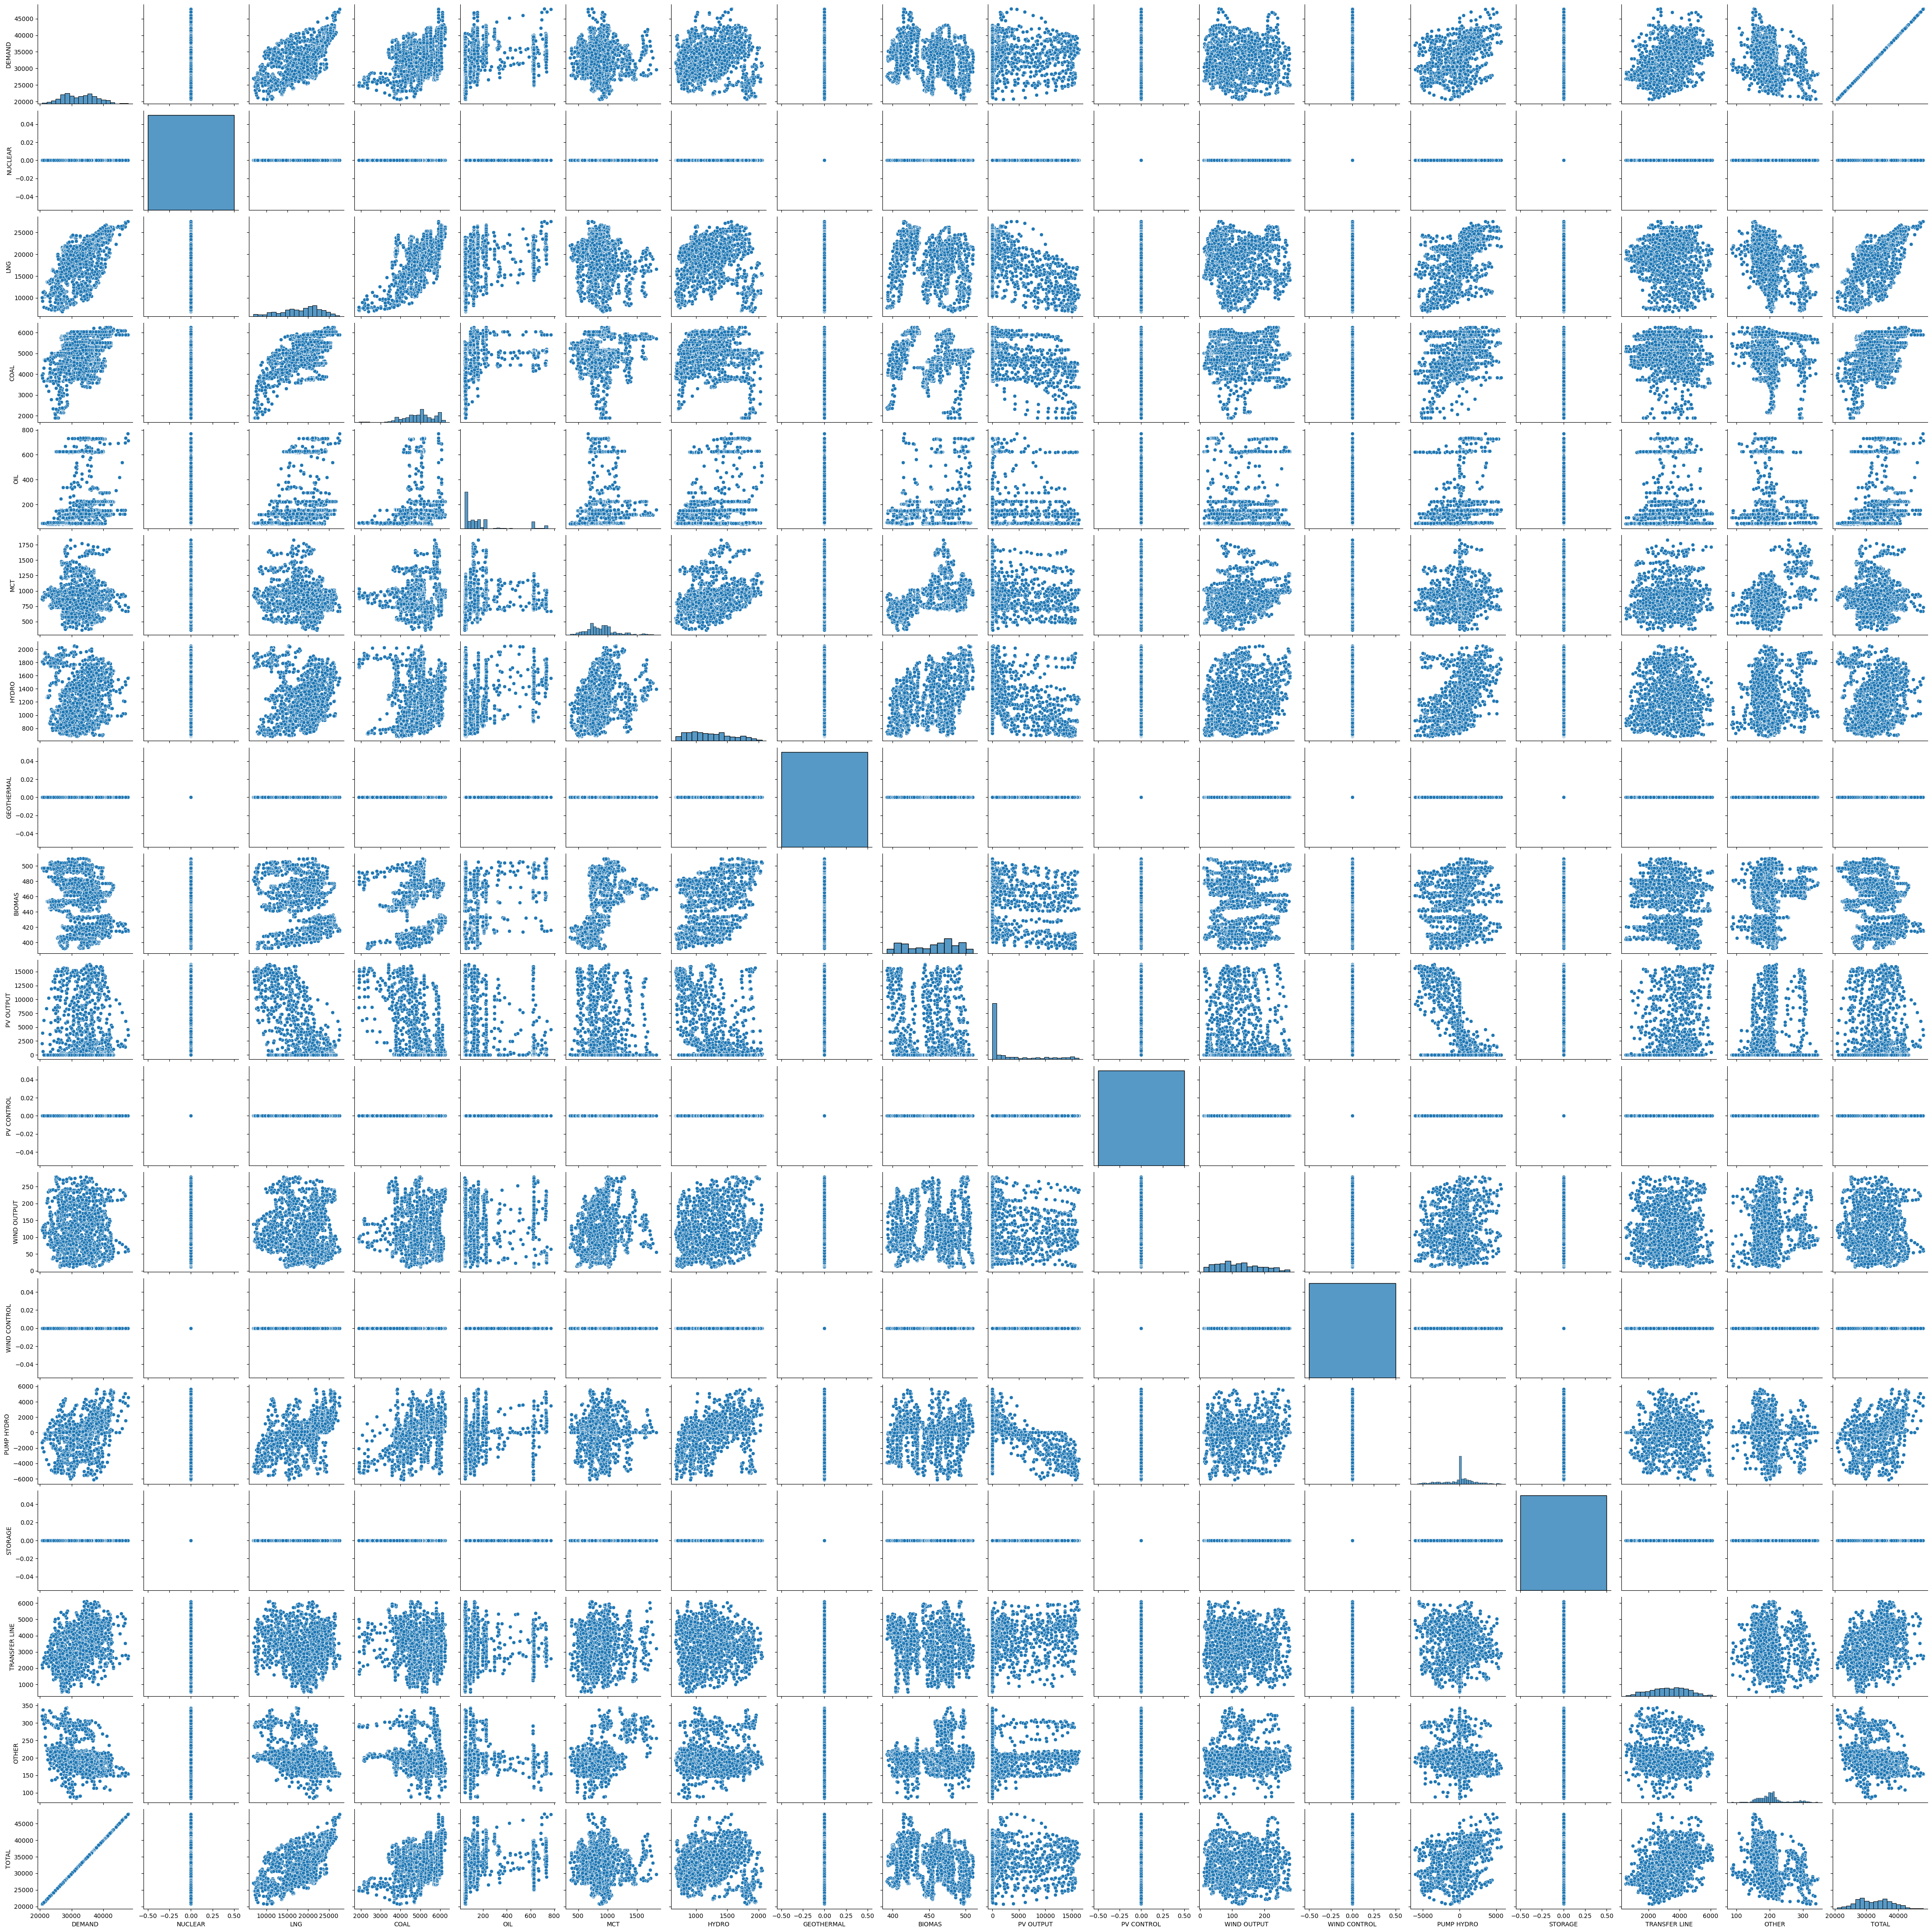

In [82]:
# over vue all data
fig = sns.pairplot(df1)
print(type(fig))